# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

In [283]:
! git clone https://github.com/ds4e/linearModels

fatal: destination path 'linearModels' already exists and is not an empty directory.


1. Clean the data and perform some EDA and visualization to get to know the data set.

In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/linearModels/lab/data/airbnb_hw.csv')
print(df.columns)
df = df.rename(columns={'Neighbourhood ': 'Neighbourhood'})
print(df.columns)
df.head()

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')
Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [285]:
print(df.dtypes)

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object


In [286]:
# Drop variables that will not be used
df = df.drop(['Host Id', 'Host Since', 'Name', 'Review Scores Rating (bin)', 'Zipcode', 'Number of Records', 'Number Of Reviews'], axis=1)

In [287]:
# Price is being read as an object, convert to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

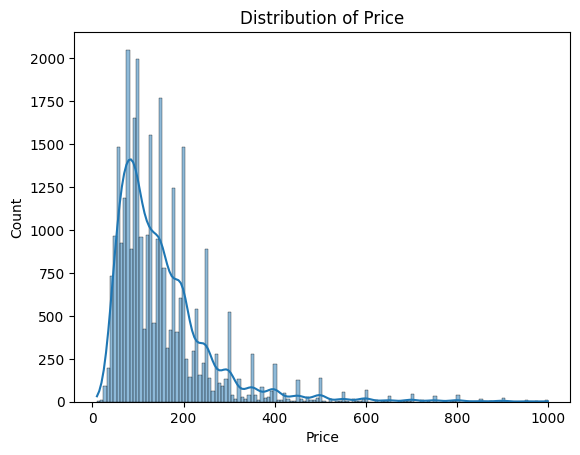

In [288]:
sns.histplot(df["Price"], kde=True)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

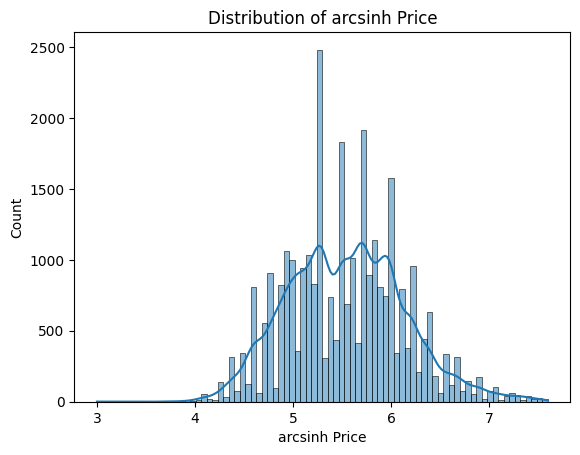

In [289]:
# Account for outliers in price variable (particularly high outliers) by taking arcsinh of price values
df['Price'] = np.arcsinh(df['Price'])

sns.histplot(df["Price"], kde=True)
plt.title("Distribution of arcsinh Price")
plt.xlabel("arcsinh Price")
plt.ylabel("Count")
plt.show()

In [290]:
df.head()

,Neighbourhood,Property Type,Room Type,Beds,Price,Review Scores Rating
0,Brooklyn,Apartment,Entire home/apt,1.0,5.669893,NaN
1,Brooklyn,Apartment,Private room,1.0,4.304248,NaN
2,Manhattan,Apartment,Private room,1.0,4.025670,NaN
3,Manhattan,Apartment,Entire home/apt,3.0,5.986458,NaN
4,Manhattan,Apartment,Private room,3.0,7.001246,96.0


In [291]:
# Missing values
df.isna().sum()

,0
Neighbourhood,0
Property Type,3
Room Type,0
Beds,85
Price,181
Review Scores Rating,8323


In [292]:
# Drop all observations with missing values
df = df.dropna()
df.isna().sum()

,0
Neighbourhood,0
Property Type,0
Room Type,0
Beds,0
Price,0
Review Scores Rating,0


In [293]:
df['Neighbourhood'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [294]:
df['Property Type'].unique()

array(['Apartment', 'Other', 'Bed & Breakfast', 'Loft', 'House',
       'Condominium', 'Townhouse', 'Dorm', 'Boat', 'Cabin', 'Villa',
       'Bungalow', 'Camper/RV', 'Treehouse', 'Lighthouse', 'Chalet',
       'Castle', 'Hut'], dtype=object)

In [295]:
df['Room Type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [296]:
df.groupby('Neighbourhood')[['Price']].mean().reset_index()

,Neighbourhood,Price
0,Bronx,4.897390
1,Brooklyn,5.373311
2,Manhattan,5.728263
3,Queens,5.134676
4,Staten Island,5.045080


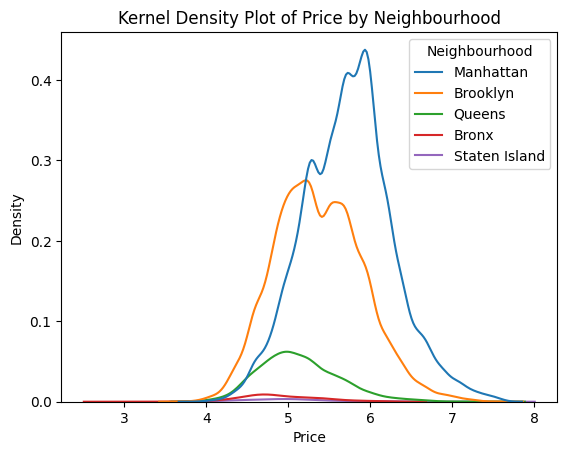

In [297]:
sns.kdeplot(data=df, x='Price', hue='Neighbourhood')
plt.title('Kernel Density Plot of Price by Neighbourhood')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

In [298]:
df.groupby('Property Type')[['Price']].mean().reset_index()

,Property Type,Price
0,Apartment,5.558203
1,Bed & Breakfast,5.186231
2,Boat,5.679470
3,Bungalow,5.607449
4,Cabin,5.644912
5,Camper/RV,4.797922
6,Castle,5.703794
7,Chalet,5.288293
8,Condominium,5.850344
9,Dorm,4.824049


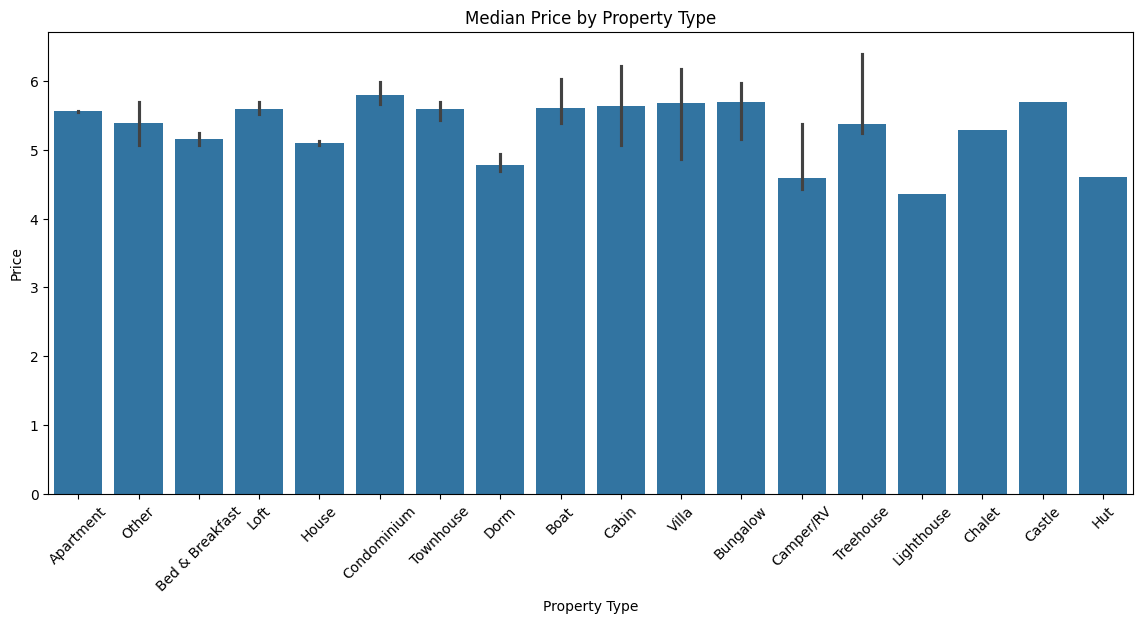

In [299]:
plt.figure(figsize=(14, 6))

sns.barplot(data=df, x='Property Type', y='Price', estimator=np.median)
plt.title('Median Price by Property Type')
plt.xticks(rotation=45)  # Rotate x labels if they overlap
plt.show()

In [300]:
df.groupby('Beds')[['Price']].mean().reset_index()

,Beds,Price
0,0.0,4.867594
1,1.0,5.375262
2,2.0,5.747310
3,3.0,5.961745
4,4.0,6.101932
5,5.0,6.296307
6,6.0,6.195188
7,7.0,6.251726
8,8.0,6.304147
9,9.0,6.926088


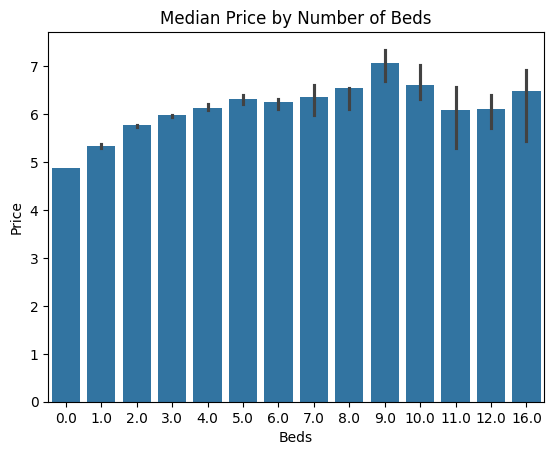

In [301]:
sns.barplot(data=df, x='Beds', y='Price', estimator=np.median)
plt.title('Median Price by Number of Beds')
plt.show()

In [302]:
df.groupby('Room Type')[['Price']].mean().reset_index()

,Room Type,Price
0,Entire home/apt,5.869553
1,Private room,5.097905
2,Shared room,4.784717


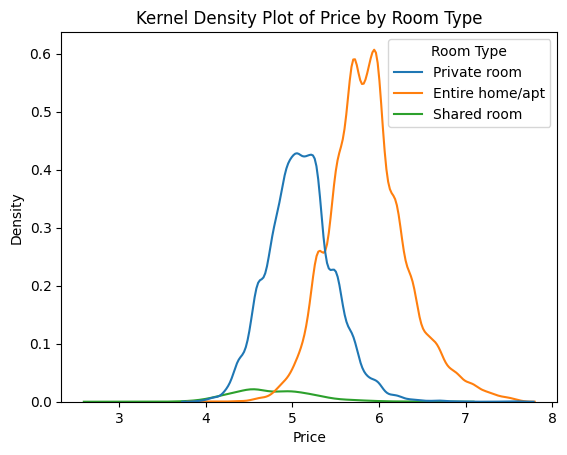

In [303]:
sns.kdeplot(data=df, x='Price', hue='Room Type')
plt.title('Kernel Density Plot of Price by Room Type')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

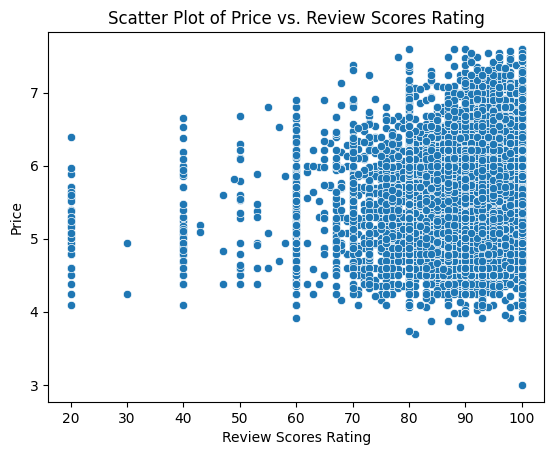

In [304]:
sns.scatterplot(data=df, x='Review Scores Rating', y='Price')
plt.title('Scatter Plot of Price vs. Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Price')
plt.show()

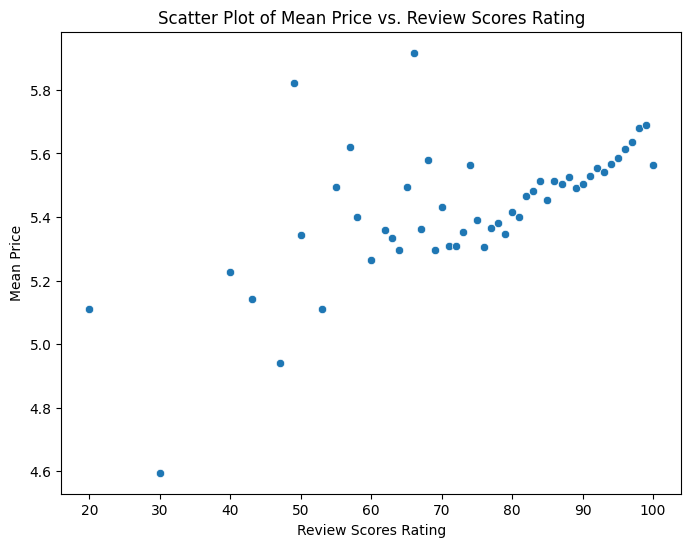

In [305]:
df_grouped = df.groupby('Review Scores Rating')[['Price']].mean().reset_index()

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_grouped, x='Review Scores Rating', y='Price')
plt.title('Scatter Plot of Mean Price vs. Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Mean Price')
plt.show()

In [306]:
df.columns

Index(['Neighbourhood', 'Property Type', 'Room Type', 'Beds', 'Price',
       'Review Scores Rating'],
      dtype='object')

2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.

In [307]:
# Transform categorical variables: room type, neighbourhood, property type, room type
df = pd.get_dummies(df, columns=['Neighbourhood', 'Property Type', 'Room Type'], dtype=int)

In [308]:
df.columns

Index(['Beds', 'Price', 'Review Scores Rating', 'Neighbourhood_Bronx',
       'Neighbourhood_Brooklyn', 'Neighbourhood_Manhattan',
       'Neighbourhood_Queens', 'Neighbourhood_Staten Island',
       'Property Type_Apartment', 'Property Type_Bed & Breakfast',
       'Property Type_Boat', 'Property Type_Bungalow', 'Property Type_Cabin',
       'Property Type_Camper/RV', 'Property Type_Castle',
       'Property Type_Chalet', 'Property Type_Condominium',
       'Property Type_Dorm', 'Property Type_House', 'Property Type_Hut',
       'Property Type_Lighthouse', 'Property Type_Loft', 'Property Type_Other',
       'Property Type_Townhouse', 'Property Type_Treehouse',
       'Property Type_Villa', 'Room Type_Entire home/apt',
       'Room Type_Private room', 'Room Type_Shared room'],
      dtype='object')

3. Implement an ~80/~20 train-test split. Put the test data aside.

In [309]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.metrics import mean_squared_error

X = df.drop('Price', axis=1)
X.head()

y = df["Price"] # Target variable

# Split the sample:
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=65) # For replication purposes

4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?

In [310]:
# Single linear regression model, predicting price based off of Beds
print("Single linear regression model, predicting price based off of Beds")

X_train_beds = X_train[['Beds']]
X_test_beds = X_test[['Beds']]

reg_beds = LinearRegression().fit(X_train_beds, y_train)

print("R squared, test set:",reg_beds.score(X_test_beds, y_test)) # R squared measure on test set

# Compute RMSE
y_test_pred = reg_beds.predict(X_test_beds)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE, test set:", rmse)

print("R squared, training set:", reg_beds.score(X_train_beds, y_train))
y_train_pred = reg_beds.predict(X_train_beds)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("RMSE, training set:", rmse_train)

Single linear regression model, predicting price based off of Beds
R squared, test set: 0.14956421686644905
RMSE, test set: 0.5319523015170472
R squared, training set: 0.156353106241085
RMSE, training set: 0.5267410218853962


In [311]:
# Single linear regression model, predicting price based off of Review Scores Rating
print("Single linear regression model, predicting price based off of Review Scores Rating")

X_train_ratings = X_train[['Review Scores Rating']]
X_test_ratings = X_test[['Review Scores Rating']]

reg_ratings = LinearRegression().fit(X_train_ratings, y_train)

print("R squared:",reg_ratings.score(X_test_ratings, y_test)) # R squared measure on test set

# Compute RMSE
y_test_pred = reg_ratings.predict(X_test_ratings)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE:", rmse)

print("R squared, training set:", reg_ratings.score(X_train_ratings, y_train))
y_train_pred = reg_ratings.predict(X_train_ratings)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("RMSE, training set:", rmse_train)

Single linear regression model, predicting price based off of Review Scores Rating
R squared: 0.017556334637579107
RMSE: 0.5717494531596948
R squared, training set: 0.012450222967593016
RMSE, training set: 0.5698968856702508


In [312]:
# Simple linear regression model, predicting price based off of Neighbourhood
print("Simple linear regression model, predicting price based off of Neighbourhood")

features = ['Neighbourhood_Bronx', 'Neighbourhood_Brooklyn', 'Neighbourhood_Manhattan', 'Neighbourhood_Queens', 'Neighbourhood_Staten Island']
X_train_neighbourhood = X_train[features]
X_test_neighbourhood = X_test[features]

reg_neighbourhood = LinearRegression().fit(X_train_neighbourhood, y_train)

print("R squared:",reg_neighbourhood.score(X_test_neighbourhood, y_test)) # R squared measure on test set
# Compute RMSE
y_test_pred = reg_neighbourhood.predict(X_test_neighbourhood)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE:", rmse)

print("R squared, training set:", reg_neighbourhood.score(X_train_neighbourhood, y_train))
y_train_pred = reg_neighbourhood.predict(X_train_neighbourhood)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("RMSE, training set:", rmse_train)

Simple linear regression model, predicting price based off of Neighbourhood
R squared: 0.13072371559981233
RMSE: 0.5378124420599474
R squared, training set: 0.14315213916912117
RMSE, training set: 0.5308461163872122


In [313]:
# Simple linear regression model, predicting price based off of Property Type
print("Simple linear regression model, predicting price based off of Property Type")

features = ['Property Type_Apartment', 'Property Type_Bed & Breakfast', 'Property Type_Boat', 'Property Type_Bungalow', 'Property Type_Cabin', 'Property Type_Camper/RV', 'Property Type_Castle', 'Property Type_Chalet', 'Property Type_Condominium', 'Property Type_Dorm', 'Property Type_House', 'Property Type_Hut', 'Property Type_Lighthouse', 'Property Type_Loft', 'Property Type_Other', 'Property Type_Townhouse', 'Property Type_Treehouse', 'Property Type_Villa']
X_train_property = X_train[features]
X_test_property = X_test[features]

reg_property = LinearRegression().fit(X_train_property, y_train)

print("R squared:",reg_property.score(X_test_property, y_test)) # R squared measure on test set
# Compute RMSE
y_test_pred = reg_property.predict(X_test_property)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE:", rmse)

print("R squared, training set:", reg_property.score(X_train_property, y_train))
y_train_pred = reg_property.predict(X_train_property)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("RMSE, training set:", rmse_train)

Simple linear regression model, predicting price based off of Property Type
R squared: 0.020530276115525603
RMSE: 0.57088342989495
R squared, training set: 0.02360989420403281
RMSE, training set: 0.566667716134148


In [314]:
# Simple linear regression model, predicting price based off of Room Type
print("Simple linear regression model, predicting price based off of Room Type ")

features = ['Room Type_Entire home/apt', 'Room Type_Private room', 'Room Type_Shared room']
X_train_room = X_train[features]
X_test_room = X_test[features]

reg_room = LinearRegression().fit(X_train_room, y_train)

print("R squared:",reg_room.score(X_test_room, y_test)) # R squared measure on test set
# Compute RMSE
y_test_pred = reg_room.predict(X_test_room)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE:", rmse)

print("R squared, training set:", reg_room.score(X_train_room, y_train))
y_train_pred = reg_room.predict(X_train_room)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("RMSE, training set:", rmse_train)

Simple linear regression model, predicting price based off of Room Type 
R squared: 0.46994564733331545
RMSE: 0.4199640663012073
R squared, training set: 0.4672374974588096
RMSE, training set: 0.418584951652368


Based on the R squared and RMSE values, the model that predicts price based off of room type performs the best (highest R squared, lowest RMSE value overall).

5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?

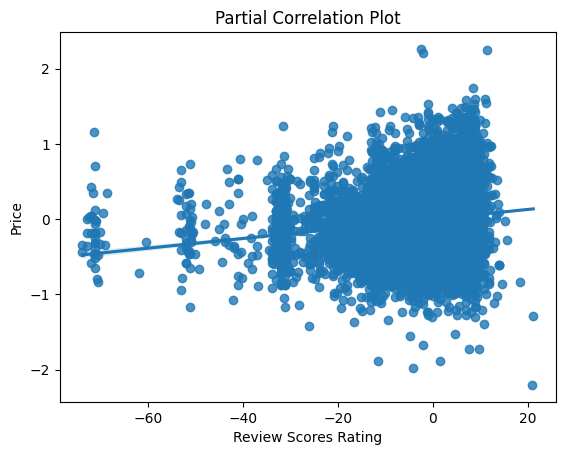

In [315]:
# Partial correlation plot for review scores rating and price
var =  'Review Scores Rating'
x_k = df[var]
X_mk = df.drop([var, "Price"],axis=1)
y = df['Price']

## 1. Regress y on x\k, save residual r_y
reg_y = LinearRegression(fit_intercept=False).fit(X_mk, y) # Fit the linear model
r_y = y - reg_y.predict(X_mk)

## 2. Regress x_k on x\k, save residual r_x
reg_k = LinearRegression(fit_intercept=False).fit(X_mk, x_k) # Fit the linear model
r_x = x_k - reg_k.predict(X_mk)

sns.regplot(y=r_y, x=r_x).set(title='Partial Correlation Plot')
plt.show()

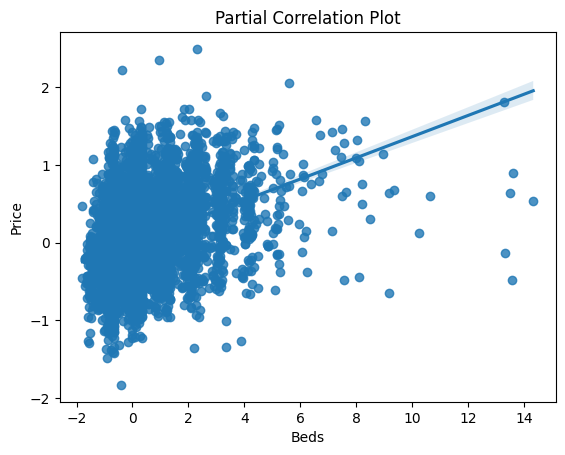

In [316]:
# Partial correlation plot for beds and price
var =  'Beds'
x_k = df[var]
X_mk = df.drop([var, "Price"],axis=1)
y = df['Price']

## 1. Regress y on x\k, save residual r_y
reg_y = LinearRegression(fit_intercept=False).fit(X_mk, y) # Fit the linear model
r_y = y - reg_y.predict(X_mk)

## 2. Regress x_k on x\k, save residual r_x
reg_k = LinearRegression(fit_intercept=False).fit(X_mk, x_k) # Fit the linear model
r_x = x_k - reg_k.predict(X_mk)

sns.regplot(y=r_y, x=r_x).set(title='Partial Correlation Plot')
plt.show()

It appears that that review scores rating have a non-linear effect on price.

6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?

In [317]:
df.columns

Index(['Beds', 'Price', 'Review Scores Rating', 'Neighbourhood_Bronx',
       'Neighbourhood_Brooklyn', 'Neighbourhood_Manhattan',
       'Neighbourhood_Queens', 'Neighbourhood_Staten Island',
       'Property Type_Apartment', 'Property Type_Bed & Breakfast',
       'Property Type_Boat', 'Property Type_Bungalow', 'Property Type_Cabin',
       'Property Type_Camper/RV', 'Property Type_Castle',
       'Property Type_Chalet', 'Property Type_Condominium',
       'Property Type_Dorm', 'Property Type_House', 'Property Type_Hut',
       'Property Type_Lighthouse', 'Property Type_Loft', 'Property Type_Other',
       'Property Type_Townhouse', 'Property Type_Treehouse',
       'Property Type_Villa', 'Room Type_Entire home/apt',
       'Room Type_Private room', 'Room Type_Shared room'],
      dtype='object')

In [318]:
# Account for non-linear relationship between review score ratings and price
df['Review Scores Rating Squared'] = df['Review Scores Rating'] ** 2

X = df.drop('Price', axis=1)
X.head()

y = df["Price"] # Target variable

# Split the sample:
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=65) # For replication purposes

In [319]:
# Model considering all features

reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
print("R squared, test set:",reg.score(X_test, y_test)) # R squared measure on test set
# Compute RMSE
y_test_pred = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE, test set:", rmse)

print("R squared, training set:", reg.score(X_train, y_train))
y_train_pred = reg.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("RMSE, training set:", rmse_train)

R squared, test set: 0.6029603317549579
RMSE, test set: 0.36347025794835125
R squared, training set: 0.6014432150367299
RMSE, training set: 0.36204444598117236


In [321]:
df.columns

Index(['Beds', 'Price', 'Review Scores Rating', 'Neighbourhood_Bronx',
       'Neighbourhood_Brooklyn', 'Neighbourhood_Manhattan',
       'Neighbourhood_Queens', 'Neighbourhood_Staten Island',
       'Property Type_Apartment', 'Property Type_Bed & Breakfast',
       'Property Type_Boat', 'Property Type_Bungalow', 'Property Type_Cabin',
       'Property Type_Camper/RV', 'Property Type_Castle',
       'Property Type_Chalet', 'Property Type_Condominium',
       'Property Type_Dorm', 'Property Type_House', 'Property Type_Hut',
       'Property Type_Lighthouse', 'Property Type_Loft', 'Property Type_Other',
       'Property Type_Townhouse', 'Property Type_Treehouse',
       'Property Type_Villa', 'Room Type_Entire home/apt',
       'Room Type_Private room', 'Room Type_Shared room',
       'Review Scores Rating Squared'],
      dtype='object')

In [323]:
# Same model, but excluding property type and Neighbourhood features
features_dropped = ['Neighbourhood_Bronx',
       'Neighbourhood_Brooklyn', 'Neighbourhood_Manhattan',
       'Neighbourhood_Queens', 'Neighbourhood_Staten Island',
       'Property Type_Apartment', 'Property Type_Bed & Breakfast',
       'Property Type_Boat', 'Property Type_Bungalow', 'Property Type_Cabin',
       'Property Type_Camper/RV', 'Property Type_Castle',
       'Property Type_Chalet', 'Property Type_Condominium',
       'Property Type_Dorm', 'Property Type_House', 'Property Type_Hut',
       'Property Type_Lighthouse', 'Property Type_Loft', 'Property Type_Other',
       'Property Type_Townhouse', 'Property Type_Treehouse',
       'Property Type_Villa']
X = df.drop(features_dropped + ["Price"], axis=1)
X.head()

y = df["Price"] # Target variable

# Split the sample:
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=65) # For replication purposes


reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
print("R squared, test set:",reg.score(X_test, y_test)) # R squared measure on test set
# Compute RMSE
y_test_pred = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE, test set:", rmse)

print("R squared, training set:", reg.score(X_train, y_train))
y_train_pred = reg.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("RMSE, training set:", rmse_train)

R squared, test set: 0.516023847847703
RMSE, test set: 0.4012951498047708
R squared, training set: 0.5122596016543878
RMSE, training set: 0.4005079584790526


7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

Interestingly, the model that performed best on both the training and test sets was the one that included all features—achieving R² values above 0.6 on both sets, significantly outperforming the others. I noticed a substantial improvement in model performance after accounting for non-linearity in the review scores ratings feature. This revealed signs of underfitting in my earlier models, where the non-linear patterns in the ratings data were not being captured, leading to poorer performance. I did not see evidence of overfitting in my models. In all scenarios, the R^2 and RMSE values were relatively similar between the training and test sets. Additionally, model performance did not get worse on the test set as more features were added.

